### This script contains the following:
1. Importing Libraries
2. Importing Data
3. Graph visualization - Networkx
4. Graph visualization - Pyvis
5. Community Detection - Leiden Algorithm
6. Analyzing Country Centrality in 20th Century Events
   1. DEGREE CENTRALITY
   2. CLOSENESS CENTRALITY
   3. BETWEENNESS CENTRALITY

## 1. Importing libraries:

In [76]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis
from cdlib import algorithms

## 2. Importing Data: 

In [48]:
# Define the relative path 
file_path = os.path.join('..', 'Data', 'country_relationships1.csv') 

In [54]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
# Display the DataFrame to check the imported data
print(df.head())

   Unnamed: 0   source   target  value
0           0  Germany   Russia      9
1           1  Austria  Germany     10
2           2  Austria   Russia      5
3           3  Austria  Hungary      6
4           4  Germany  Hungary      9


In [56]:
df.shape

(67, 4)

## 3. Graph visualization - Networkx

In [58]:
# Create a network object from relationship_df
G = nx.from_pandas_edgelist(df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

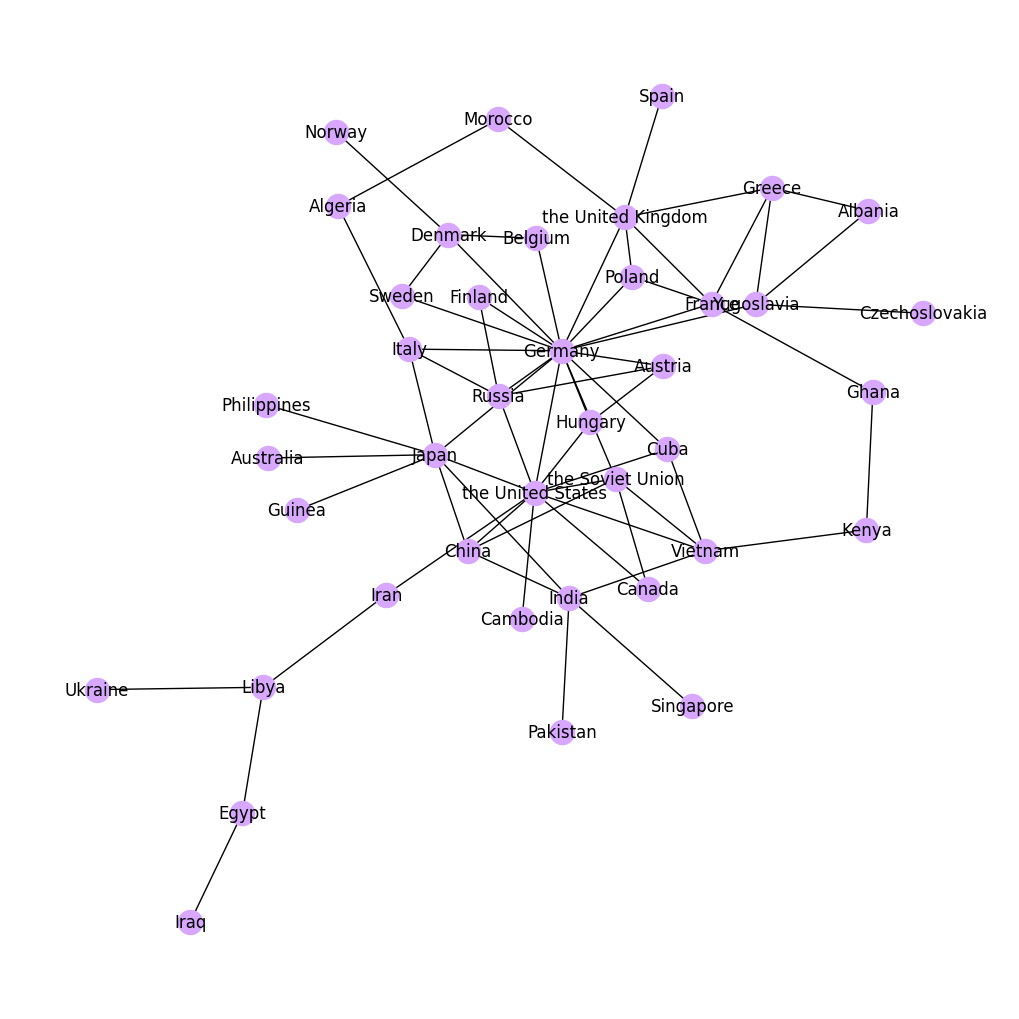

In [60]:
# Graph the network object
h = plt.figure(figsize = (10,10))
pos = nx.kamada_kawai_layout(G) # Define the layout for the graph

nx.draw(G, with_labels = True, node_color = '#D8A7FF', pos = pos) # Draw the graph
# Define the relative path to save the image
output_path = os.path.join('..', 'Visualizations', 'network_graph.png')
# Save the figure as a PNG file to the relative path
plt.savefig(output_path, format='png')
plt.show() 

## 4. Graph visualization - Pyvis

In [63]:
# Define a new network object
net = Network()
net = Network(notebook = True, width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Set up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion() # Space nodes out appropriately
# Save the HTML file using a relative path
output_path = os.path.join('..', 'Visualizations', '20th_century_country_relationships.html')
net.show(output_path)


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## 5. Community Detection - Leiden Algorithm

In [78]:
# Apply the Leiden algorithm to the network object
coms = algorithms.leiden(G)

In [80]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [82]:
# Map the community data onto their respective nodes
new_com = coms.to_node_community_map()

In [84]:
new_com

defaultdict(list,
            {'Yugoslavia': [0],
             'Czechoslovakia': [0],
             'Spain': [0],
             'the United Kingdom': [0],
             'France': [0],
             'Poland': [0],
             'Greece': [0],
             'Albania': [0],
             'Morocco': [0],
             'Algeria': [0],
             'Germany': [1],
             'Russia': [1],
             'Austria': [1],
             'Hungary': [1],
             'Italy': [1],
             'Belgium': [1],
             'Denmark': [1],
             'Norway': [1],
             'Sweden': [1],
             'Finland': [1],
             'the Soviet Union': [2],
             'the United States': [2],
             'Vietnam': [2],
             'Kenya': [2],
             'Ghana': [2],
             'Cuba': [2],
             'Cambodia': [2],
             'Canada': [2],
             'Japan': [3],
             'China': [3],
             'Philippines': [3],
             'Australia': [3],
             'Guinea': [3],
 

In [86]:
# Convert new_com into a dictionary
dict_com = {k:v[0] for k,v in new_com.items()}

In [88]:
dict_com

{'Yugoslavia': 0,
 'Czechoslovakia': 0,
 'Spain': 0,
 'the United Kingdom': 0,
 'France': 0,
 'Poland': 0,
 'Greece': 0,
 'Albania': 0,
 'Morocco': 0,
 'Algeria': 0,
 'Germany': 1,
 'Russia': 1,
 'Austria': 1,
 'Hungary': 1,
 'Italy': 1,
 'Belgium': 1,
 'Denmark': 1,
 'Norway': 1,
 'Sweden': 1,
 'Finland': 1,
 'the Soviet Union': 2,
 'the United States': 2,
 'Vietnam': 2,
 'Kenya': 2,
 'Ghana': 2,
 'Cuba': 2,
 'Cambodia': 2,
 'Canada': 2,
 'Japan': 3,
 'China': 3,
 'Philippines': 3,
 'Australia': 3,
 'Guinea': 3,
 'India': 3,
 'Pakistan': 3,
 'Singapore': 3,
 'Libya': 4,
 'Ukraine': 4,
 'Egypt': 4,
 'Iraq': 4,
 'Iran': 4}

In [90]:
# Re-visualize network graph with the communities as an argument
nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
com_net.from_nx(G)

# Set up node size attributes
com_net.show_buttons(filter_ = True)
com_net.repulsion() # Space nodes out appropriately
output_path = "../Visualizations/20th_century_country_communities_leiden.html"
com_net.show(output_path)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## 6. Analyzing Country Centrality in 20th Century Events

### A. DEGREE CENTRALITY

In [94]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Germany': 0.4,
 'Russia': 0.125,
 'Austria': 0.07500000000000001,
 'Hungary': 0.07500000000000001,
 'Yugoslavia': 0.1,
 'Czechoslovakia': 0.025,
 'Italy': 0.1,
 'Spain': 0.025,
 'the United Kingdom': 0.15000000000000002,
 'France': 0.125,
 'Poland': 0.07500000000000001,
 'the Soviet Union': 0.125,
 'Belgium': 0.05,
 'Denmark': 0.1,
 'Norway': 0.025,
 'Sweden': 0.05,
 'Greece': 0.1,
 'Albania': 0.05,
 'Libya': 0.07500000000000001,
 'Ukraine': 0.025,
 'Egypt': 0.05,
 'Iraq': 0.025,
 'Japan': 0.2,
 'the United States': 0.275,
 'Morocco': 0.05,
 'Algeria': 0.05,
 'China': 0.1,
 'Philippines': 0.025,
 'Australia': 0.025,
 'Guinea': 0.025,
 'India': 0.125,
 'Iran': 0.05,
 'Vietnam': 0.125,
 'Kenya': 0.05,
 'Ghana': 0.05,
 'Cuba': 0.07500000000000001,
 'Cambodia': 0.025,
 'Canada': 0.05,
 'Finland': 0.05,
 'Pakistan': 0.025,
 'Singapore': 0.025}

In [96]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['Countries','Centrality'])
degree_df.sort_values(by = ['Centrality'], ascending=False, inplace = True)
degree_df['Centrality'] = degree_df['Centrality'].apply(lambda x: round(x, 4)) # Round centrality measure to 4 decimal places

In [98]:
# Create a new column in dataframe for Leiden communities
degree_df['Community'] = degree_df['Countries'].map(dict_com)

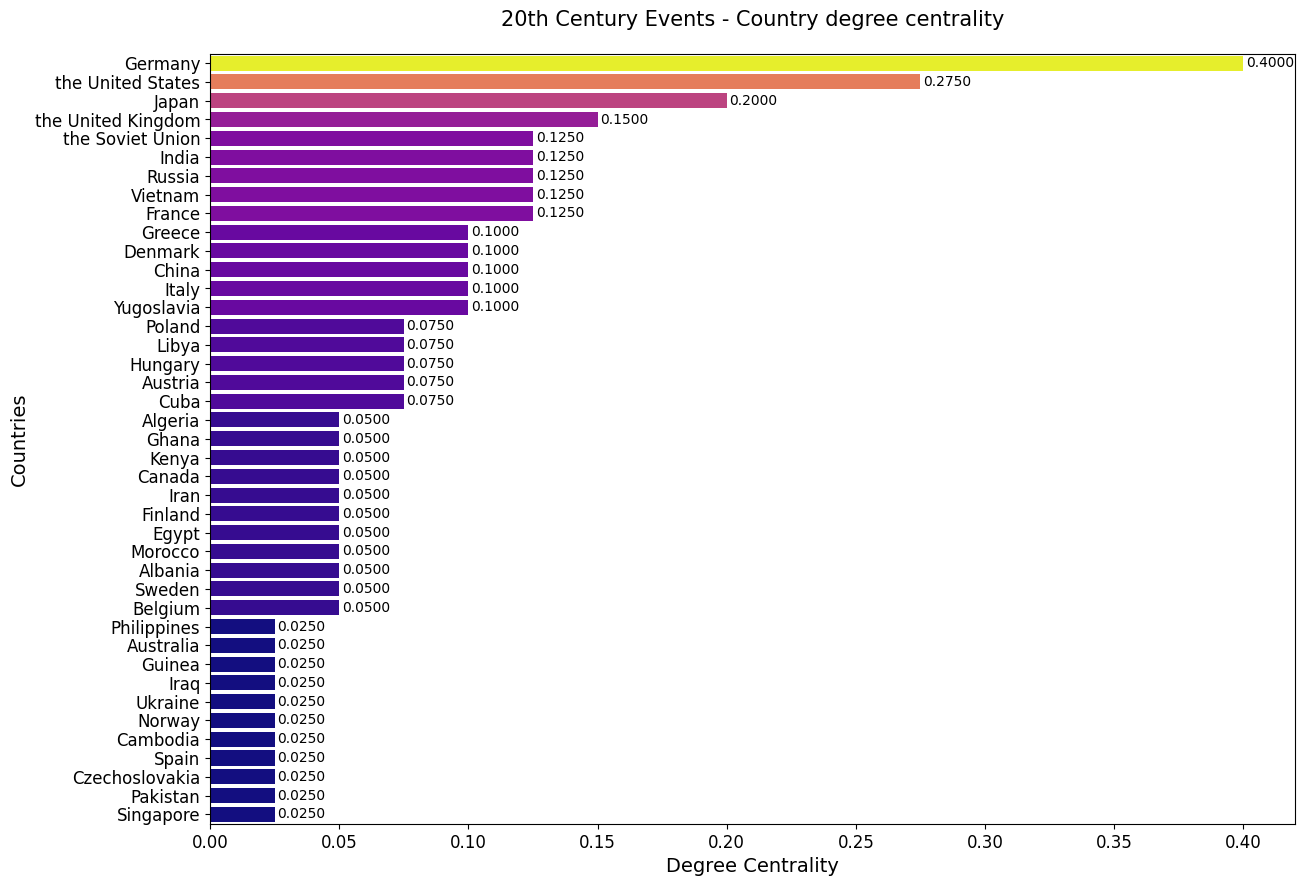

In [106]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
# Normalize the centrality values for the colormap
norm = Normalize(vmin=degree_df['Centrality'].min(), vmax=degree_df['Centrality'].max())
cmap = cm.get_cmap('plasma') 

# Generate shades of purple based on centrality values
degree_colormap = [cmap(norm(i)) for i in degree_df['Centrality']]

# Plot the closeness centrality
fig1, ax1 = plt.subplots(figsize = (14, 10))
sns.barplot(x = "Centrality", y = "Countries", palette = degree_colormap,
            saturation = 0.9, data = degree_df)

# Formatting for title and axes
plt.title('20th Century Events - Country degree centrality', fontsize = 15, pad=20)
plt.xlabel('Degree Centrality', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add data labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.4f', color='black', label_type='edge', padding=2)
    
# Save the plot to the Visualizations folder
output_path = "../Visualizations/degree_centrality_plot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

### B. CLOSENESS CENTRALITY

In [109]:
# Calculate closeness centrality of network object, and convert output into a sorted dataframe
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['Countries','Centrality'])
closeness_df.sort_values(by = ['Centrality'], ascending=False, inplace = True)
closeness_df['Centrality'] = closeness_df['Centrality'].apply(lambda x: round(x, 4)) # Round centrality measure to 4 decimal places

In [111]:
# Create a new column in dataframe for Leiden communities
closeness_df['Community'] = closeness_df['Countries'].map(dict_com)

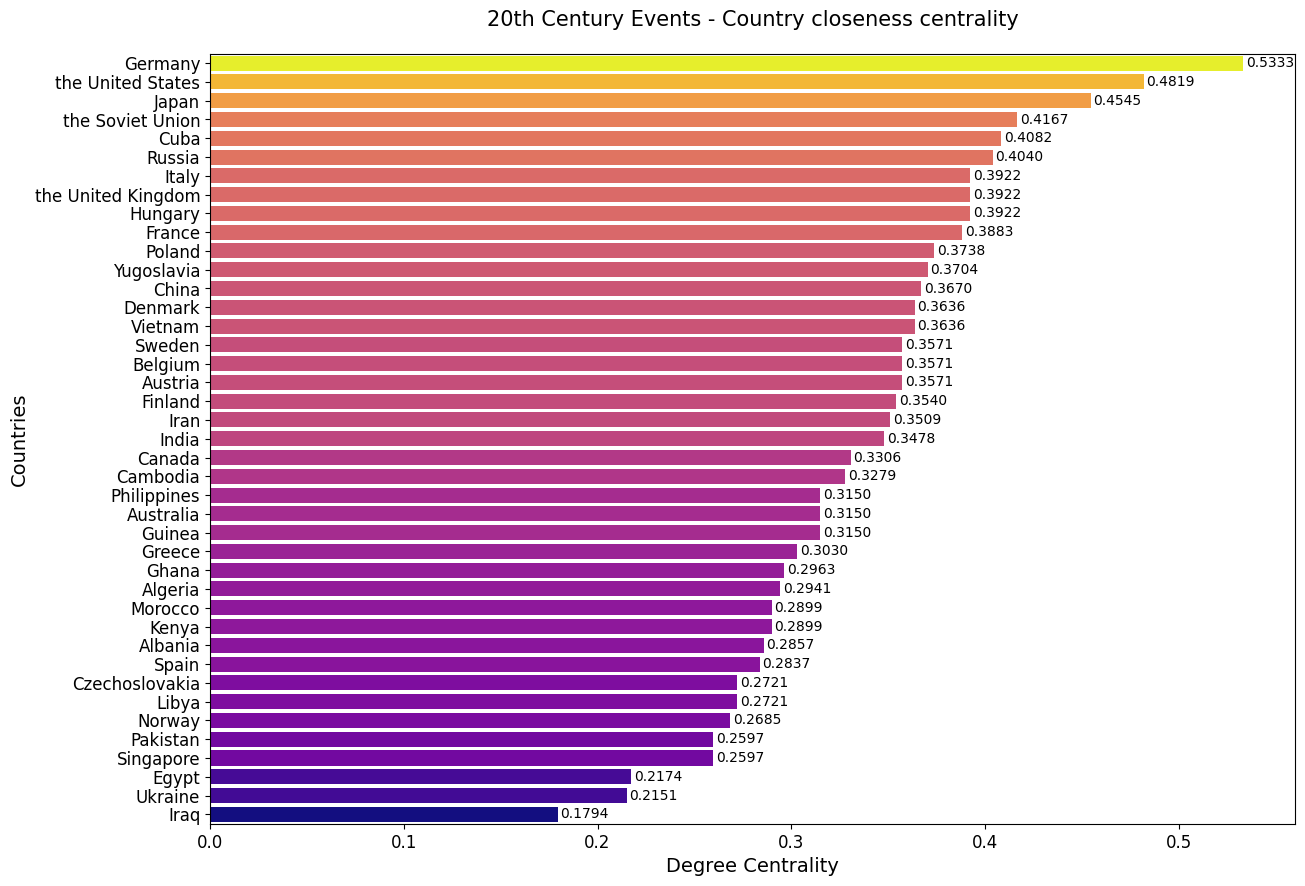

In [124]:
# Normalize the centrality values for the colormap
norm2 = Normalize(vmin=closeness_df['Centrality'].min(), vmax=closeness_df['Centrality'].max())
cmap2 = cm.get_cmap('plasma') 

# Generate shades of purple based on centrality values
degree_colormap2 = [cmap2(norm2(i)) for i in closeness_df['Centrality']]

# Plot the closeness centrality
fig2, ax2 = plt.subplots(figsize = (14, 10))
sns.barplot(x = "Centrality", y = "Countries", palette = degree_colormap2,
            saturation = 0.9, data = closeness_df)

# Formatting for title and axes
plt.title('20th Century Events - Country closeness centrality', fontsize = 15, pad=20)
plt.xlabel('Degree Centrality', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add data labels
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.4f', color='black', label_type='edge', padding=2)
    
# Save the plot to the Visualizations folder
output_path = "../Visualizations/CLOSENESS_plot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

### C. BETWEENNESS CENTRALITY

In [120]:
# Calculate betweenness centrality of network object, and convert output into a sorted dataframe
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame(betweenness_dict.items(), columns=['Countries','Centrality'])
betweenness_df.sort_values(by = ['Centrality'], ascending=False, inplace = True)
betweenness_df['Centrality'] = betweenness_df['Centrality'].apply(lambda x: round(x, 4)) # Round centrality measure to 4 decimal places

In [122]:
# Create a new column in dataframe for Leiden communities
betweenness_df['Community'] = betweenness_df['Countries'].map(dict_com)

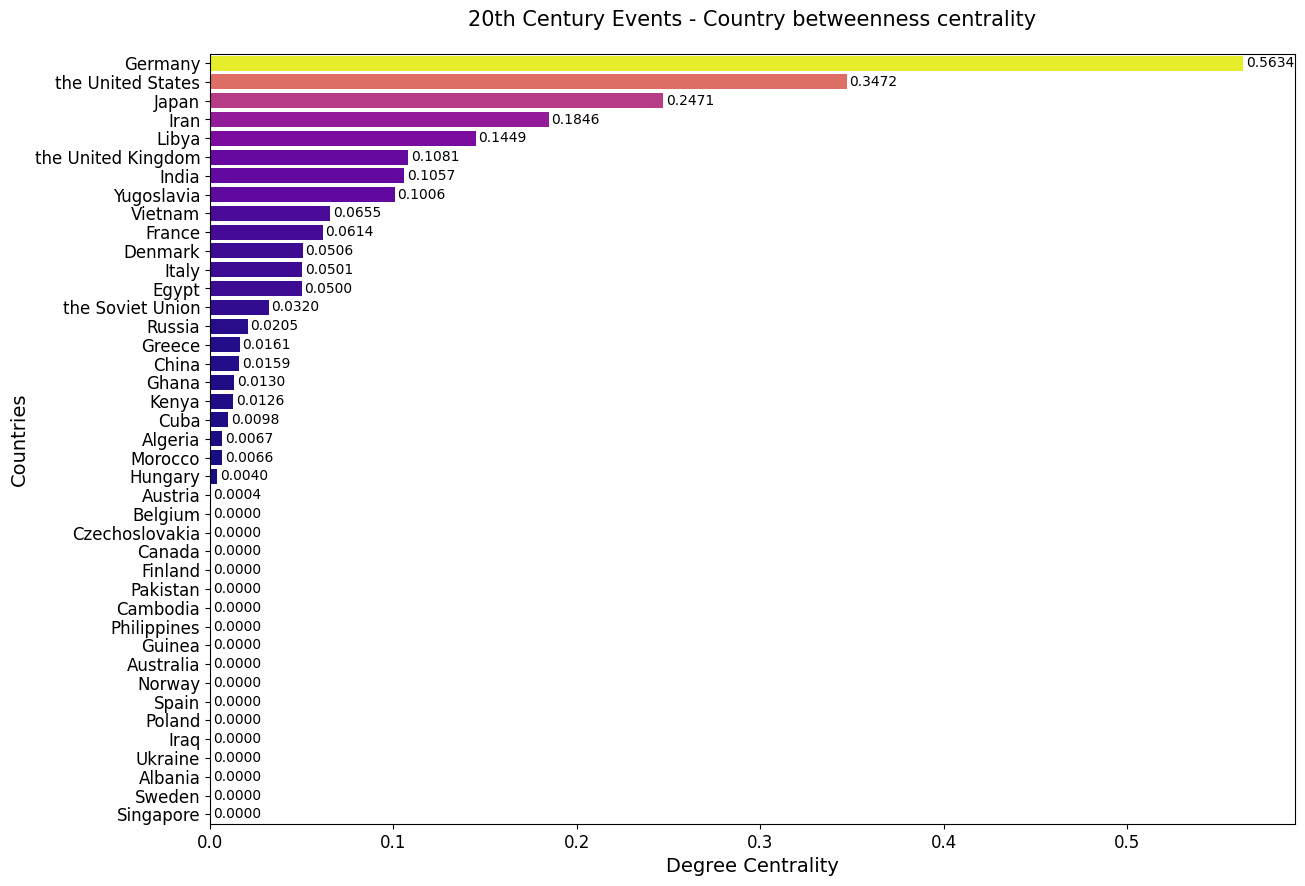

In [126]:
# Normalize the centrality values for the colormap
norm3 = Normalize(vmin=betweenness_df['Centrality'].min(), vmax=betweenness_df['Centrality'].max())
cmap3 = cm.get_cmap('plasma') 

# Generate shades of purple based on centrality values
degree_colormap3 = [cmap3(norm3(i)) for i in betweenness_df['Centrality']]

# Plot the closeness centrality
fig3, ax3 = plt.subplots(figsize = (14, 10))
sns.barplot(x = "Centrality", y = "Countries", palette = degree_colormap3,
            saturation = 0.9, data = betweenness_df)

# Formatting for title and axes
plt.title('20th Century Events - Country betweenness centrality', fontsize = 15, pad=20)
plt.xlabel('Degree Centrality', fontsize = 14)
plt.ylabel('Countries', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add data labels
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.4f', color='black', label_type='edge', padding=2)
    
# Save the plot to the Visualizations folder
output_path = "../Visualizations/betweenness_centrality_plot.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
